In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [51]:
!pip install --upgrade statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [3]:
data = pd.read_csv("E:\Retail Sale Forecasting\Retail_sale.csv")

In [5]:
data.head()

,Unnamed: 0,Date,Sales
0,0,2000-01-01,117.984555
1,1,2000-01-02,104.709535
2,2,2000-01-03,110.859071
3,3,2000-01-04,123.844046
4,4,2000-01-05,120.473710


In [7]:
data.drop(["Unnamed: 0"],axis = 1 , inplace = True)

In [9]:
data.head()

,Date,Sales
0,2000-01-01,117.984555
1,2000-01-02,104.709535
2,2000-01-03,110.859071
3,2000-01-04,123.844046
4,2000-01-05,120.473710


In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
data.set_index('Date', inplace=True)

In [15]:
data

,Sales
Date,
2000-01-01,117.984555
2000-01-02,104.709535
2000-01-03,110.859071
2000-01-04,123.844046
2000-01-05,120.473710
...,...
2027-05-14,296.672793
2027-05-15,314.976472
2027-05-16,319.504555


In [27]:
monthly_sales = data['Sales'].resample('M').sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6128\551789170.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Sales'].resample('M').sum()


In [29]:
monthly_sales

Date
2000-01-31    3410.221435
2000-02-29    3245.976944
2000-03-31    3693.910350
2000-04-30    3797.587387
2000-05-31    3658.958759
                 ...     
2027-01-31    9418.990924
2027-02-28    8828.268991
2027-03-31    9931.301722
2027-04-30    9532.197697
2027-05-31    5688.972968
Freq: ME, Name: Sales, Length: 329, dtype: float64

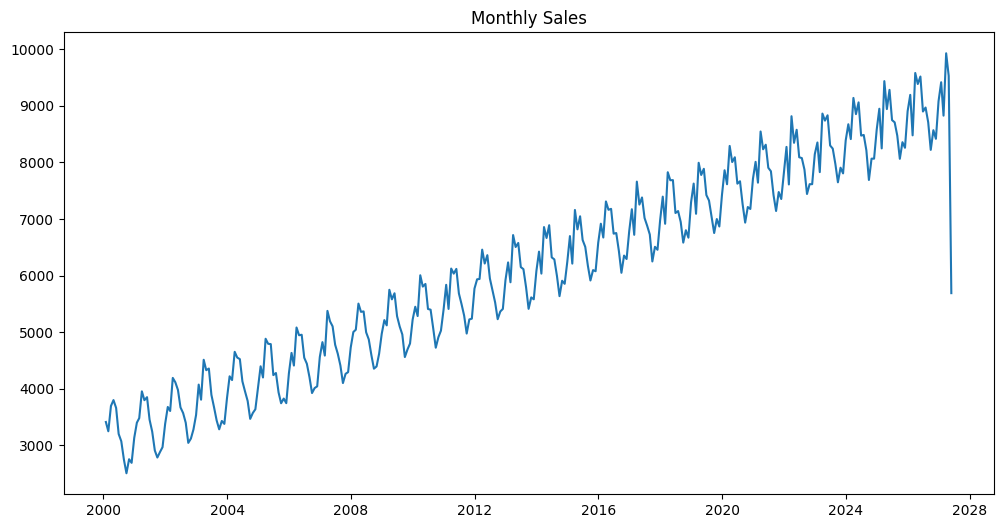

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title('Monthly Sales')
plt.show()


In [33]:
result = adfuller(monthly_sales)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.6032455061294184
p-value: 0.48196295302635717


In [37]:
diff_sales = monthly_sales.diff().dropna()
diff_sales

Date
2000-02-29    -164.244491
2000-03-31     447.933406
2000-04-30     103.677037
2000-05-31    -138.628627
2000-06-30    -460.312928
                 ...     
2027-01-31     336.163143
2027-02-28    -590.721933
2027-03-31    1103.032731
2027-04-30    -399.104024
2027-05-31   -3843.224729
Freq: ME, Name: Sales, Length: 328, dtype: float64

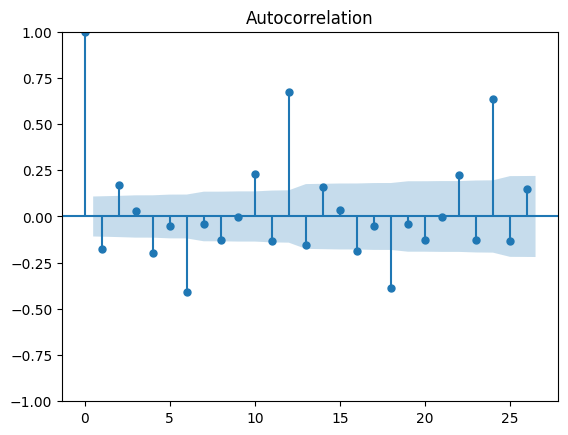

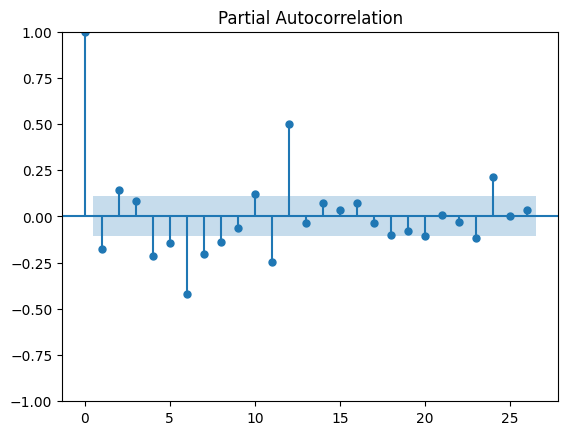

In [39]:
plot_acf(diff_sales)
plot_pacf(diff_sales)
plt.show()

In [61]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 0))  # Replace p, d, q with determined values

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  329
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2451.575
Date:                Sun, 21 Jul 2024   AIC                           4907.150
Time:                        14:26:40   BIC                           4914.736
Sample:                    01-31-2000   HQIC                          4910.176
                         - 05-31-2027                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2313      0.070     -3.300      0.001      -0.369      -0.094
sigma2      1.823e+05   4742.761     38.446      0.000    1.73e+05    1.92e+05
Ljung-Box (L1) (Q):                   0.27   Jarque-

In [63]:
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6128\3537583139.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M')


In [65]:
forecast_values

2027-06-30    6577.852290
2027-07-31    6372.268046
2027-08-31    6419.816549
2027-09-30    6408.819305
2027-10-31    6411.362800
2027-11-30    6410.774528
2027-12-31    6410.910587
2028-01-31    6410.879118
2028-02-29    6410.886396
2028-03-31    6410.884713
2028-04-30    6410.885102
2028-05-31    6410.885012
Freq: ME, Name: predicted_mean, dtype: float64

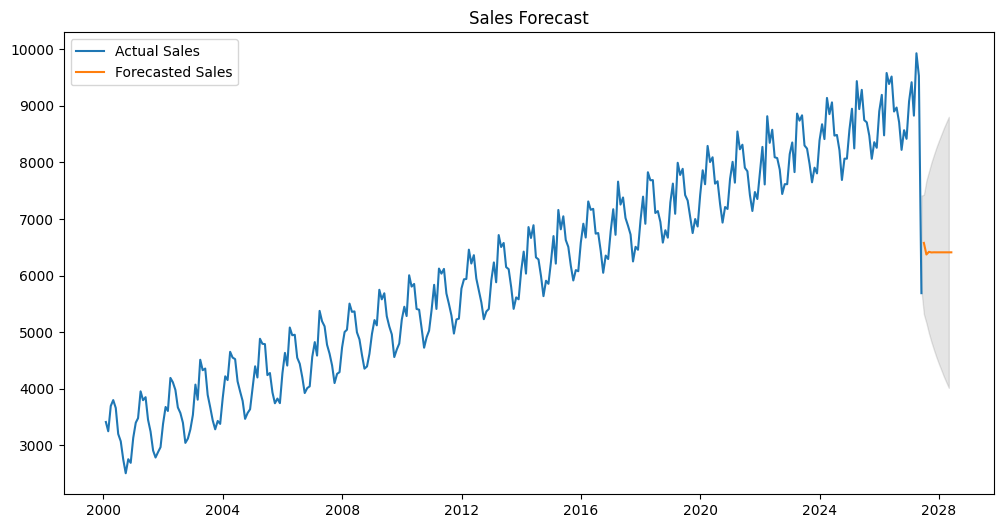

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(forecast_values, label='Forecasted Sales')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='k', alpha=0.1)
plt.title('Sales Forecast')
plt.legend()
plt.show()

In [73]:
forecast_values

2027-06-30    6577.852290
2027-07-31    6372.268046
2027-08-31    6419.816549
2027-09-30    6408.819305
2027-10-31    6411.362800
2027-11-30    6410.774528
2027-12-31    6410.910587
2028-01-31    6410.879118
2028-02-29    6410.886396
2028-03-31    6410.884713
2028-04-30    6410.885102
2028-05-31    6410.885012
Freq: ME, Name: predicted_mean, dtype: float64

In [75]:
monthly_sales

Date
2000-01-31    3410.221435
2000-02-29    3245.976944
2000-03-31    3693.910350
2000-04-30    3797.587387
2000-05-31    3658.958759
                 ...     
2027-01-31    9418.990924
2027-02-28    8828.268991
2027-03-31    9931.301722
2027-04-30    9532.197697
2027-05-31    5688.972968
Freq: ME, Name: Sales, Length: 329, dtype: float64

In [77]:
forecast_df = pd.DataFrame({
    'Sales': forecast_values
}, index=forecast_index)

In [79]:
forecast_df

,Sales
2027-05-31,NaN
2027-06-30,6577.852290
2027-07-31,6372.268046
2027-08-31,6419.816549
2027-09-30,6408.819305
2027-10-31,6411.362800
2027-11-30,6410.774528
2027-12-31,6410.910587
2028-01-31,6410.879118
2028-02-29,6410.886396


In [81]:
monthly_sales = pd.DataFrame(monthly_sales)

In [83]:
monthly_sales

,Sales
Date,
2000-01-31,3410.221435
2000-02-29,3245.976944
2000-03-31,3693.910350
2000-04-30,3797.587387
2000-05-31,3658.958759
...,...
2027-01-31,9418.990924
2027-02-28,8828.268991
2027-03-31,9931.301722


In [85]:
combined_data = pd.concat([monthly_sales, forecast_df])

In [89]:
combined_data.to_csv("E:\Retail Sale Forecasting\Combined_data.csv")

In [93]:
monthly_sales.shape

(329, 1)

In [97]:
forecast_df.shape

(12, 1)

In [99]:
combined_data.shape

(341, 1)